In [2]:
import xmlrpc.server

import numpy as np
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib import pyplot
# uncomment the next line and install the "ipympl" python package to get interactive plots
#%matplotlib widget

In [2]:
def ComputeTPSWeights(X, Y, Z):
    """This function constructs a thin plate spline interpolating the given three-
       dimensional points by means of a two-dimensional function. 
      \param X,Y,Z Three arrays of shape (n,) containing n points in three-
             dimensional space. 
      \return An array of shape identical to X where the i-th entry stores the 
              weight to be used for the radial basis function centered at 
              (X[i],Y[i])."""
    mataij = np.empty((len(X),len(Y)))
    for i in range(len(X)):
        for j in range(len(Y)):
            a = np.sqrt((X[i]-X[j])**2+(Y[i]-Y[j])**2)
            a = np.max([a,10**(-8)])
            a = a**2*np.log(a)
            mataij[i,j] = a
    Weights = np.linalg.solve(mataij,Z)

    return Weights



 # TODO Implement the solution

In [3]:
def EvaluateTPSSpline(XNew, YNew, X, Y, Weights):
    """Given the weights for a thin plate spline as returned by ComputeTPSWeights 
       this function evaluates the thin plate spline at prescribed locations.
      \param XNew,YNew The x and y coordinates at which the TPS spline should be 
             evaluated. These are np.ndarray objects of arbitrary but identical 
             shape.
      \param X,Y The coordinates passed to ComputeTPSWeights().
      \param Weights The weights returned by ComputeTPSWeights().
      \return An array of shape identical to XNew containing the value of the thin 
              plate spline at the coordinates given by XNew and YNew."""
    Znew = np.empty(XNew.shape)
    for j in range(len(X)):
        a = np.sqrt((XNew-X[j])**2+(YNew-Y[j])**2)
        a = np.maximum(a,np.full(a.shape,10**(-8)))
        a = a**2*np.log(a)
        Znew += Weights[j]*a
    return Znew
        

In [4]:
nPoint=20
X=np.random.rand(nPoint)
Y=np.random.rand(nPoint)
Z=np.random.rand(nPoint)
# Produce a regular grid for evaluation of the thin plate spline
nGridCell=41
XNew=np.linspace(0.0,1.0,nGridCell)
YNew=np.linspace(0.0,1.0,nGridCell)
XNew,YNew=np.meshgrid(XNew,YNew)
# Construct and evaluate the thin plate spline
Weights=ComputeTPSWeights(X,Y,Z)
ZNew=EvaluateTPSSpline(XNew,YNew,X,Y,Weights)

# Check whether all points have been fitted correctly
ZReconstructed=EvaluateTPSSpline(X,Y,X,Y,Weights)
print("When the solution is correct, the following number should be near zero:")
print(np.linalg.norm(Z-ZReconstructed))

When the solution is correct, the following number should be near zero:
5.834623723384911e-15


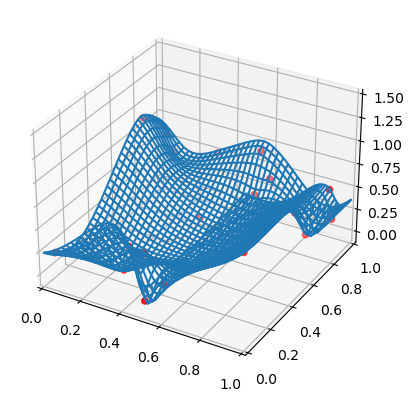

In [5]:
# Plot the input points and the interpolated function
Axes=pyplot.subplot(projection="3d")
Axes.scatter3D(X,Y,Z,color="r")
Axes.set_xlim(0.0,1.0)
Axes.set_ylim(0.0,1.0)
Axes.set_zlim(np.min(ZNew),np.max(ZNew))
Axes.plot_wireframe(XNew,YNew,ZNew,rstride=1,cstride=1)
pyplot.show()

In [28]:
import numpy as np
import array_to_latex as a2l
matrix = np.random.randint(0,10, (10, 10))
a2l.to_clp(matrix, frmt = '{:6.2f}', arraytype = 'bmatrix')